In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("ML course notebooks/DATA/gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [7]:
df.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

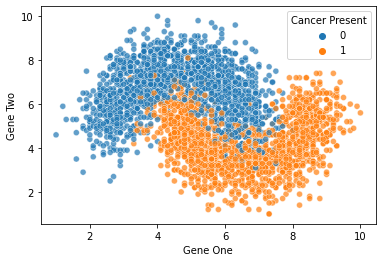

In [8]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha=0.7)

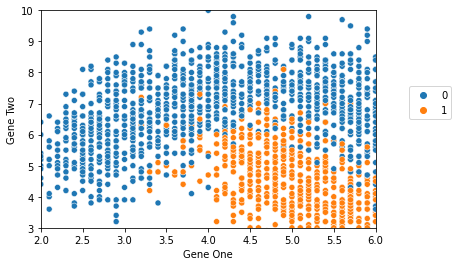

In [9]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df)
plt.xlim(2, 6)
plt.ylim(3, 10)
plt.legend(loc=(1.1, 0.5))

In [10]:
X = df.drop('Cancer Present', axis=1)
X

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [11]:
y = df['Cancer Present']
y

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
full_test = pd.concat([X_test, y_test], axis=1)

In [20]:
len(full_test)

900

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

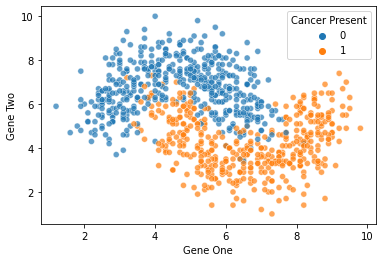

In [21]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present',
                data=full_test, alpha=0.7)

In [22]:
y_pred = knn_model.predict(scaled_X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.9011111111111111

In [25]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



# Elbow Method for choosing reasonable K-values:

In [27]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

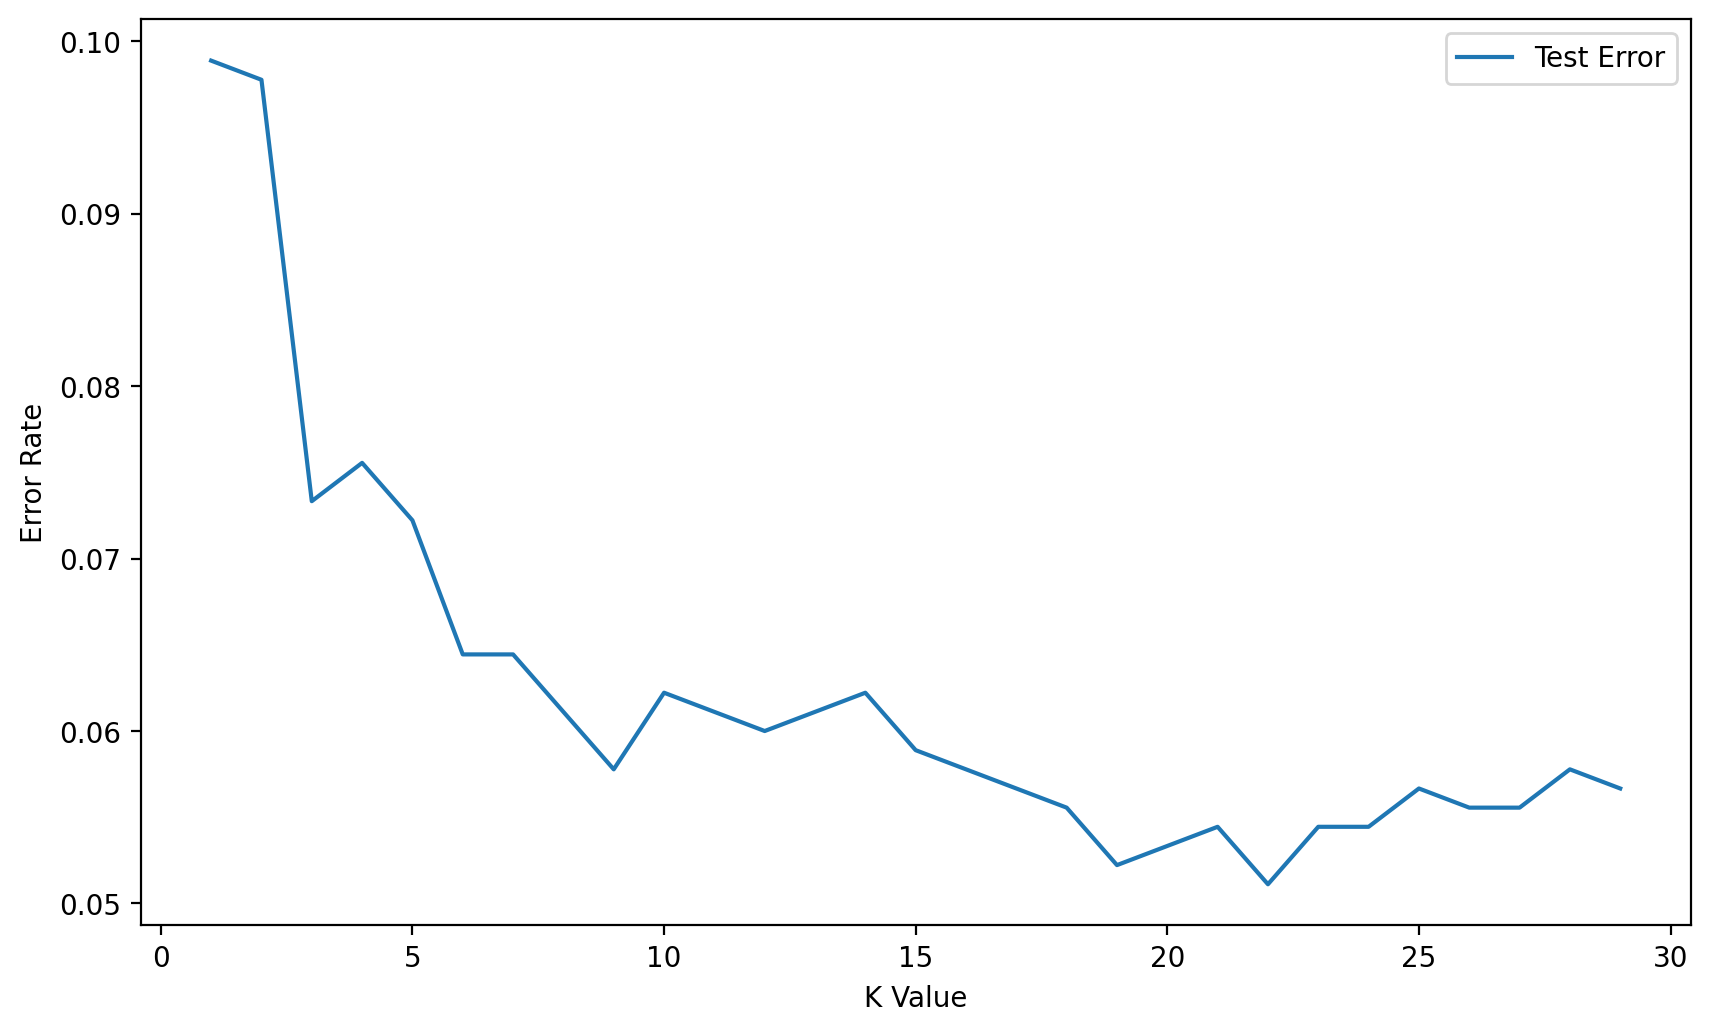

In [28]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(range(1, 30), test_error_rates, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# Final model:

In [29]:
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scaler', scaler), ('knn14', knn14)]

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
pipe = Pipeline(operations)

In [34]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [35]:
pipe_pred = pipe.predict(X_test)

In [36]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

